In [2]:
sentences = "Thank you so much. That is so nice. he is a great guy. He does not get a fair press. he does not get it. It is just not fair. And I have to tell you I am here, and very strongly here, because I have great respect for Steve King and have great respect likewise for Citizens United, David and everybody, and tremendous resect for the Tea Party. Also, also the people of Iowa. They have something in common. Hard-working people"
print(sentences)

Thank you so much. That is so nice. he is a great guy. He does not get a fair press. he does not get it. It is just not fair. And I have to tell you I am here, and very strongly here, because I have great respect for Steve King and have great respect likewise for Citizens United, David and everybody, and tremendous resect for the Tea Party. Also, also the people of Iowa. They have something in common. Hard-working people


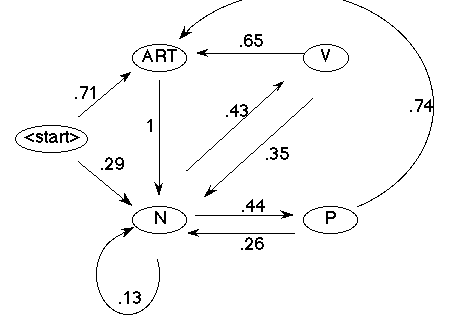

In [3]:
from IPython.display import Image
Image("https://github.com/youngjai12/Bayesian/blob/master/sentenceMarkov.png")


In [3]:
corpus = sentences.split()
print(corpus)

['Thank', 'you', 'so', 'much.', 'That', 'is', 'so', 'nice.', 'he', 'is', 'a', 'great', 'guy.', 'He', 'does', 'not', 'get', 'a', 'fair', 'press.', 'he', 'does', 'not', 'get', 'it.', 'It', 'is', 'just', 'not', 'fair.', 'And', 'I', 'have', 'to', 'tell', 'you', 'I', 'am', 'here,', 'and', 'very', 'strongly', 'here,', 'because', 'I', 'have', 'great', 'respect', 'for', 'Steve', 'King', 'and', 'have', 'great', 'respect', 'likewise', 'for', 'Citizens', 'United,', 'David', 'and', 'everybody,', 'and', 'tremendous', 'resect', 'for', 'the', 'Tea', 'Party.', 'Also,', 'also', 'the', 'people', 'of', 'Iowa.', 'They', 'have', 'something', 'in', 'common.', 'Hard-working', 'people']


In [4]:
def make_pairs(corpus):
    for i in range(len(corpus) - 1):
        yield (corpus[i], corpus[i + 1])

pairs = make_pairs(corpus)
pairs

<generator object make_pairs at 0x7efbf46d4bf8>

In [5]:
word_dict = {}
for word_1, word_2 in pairs:
    if word_1 in word_dict.keys():
        word_dict[word_1].append(word_2)
    else:
        word_dict[word_1] = [word_2]

word_dict        

{'Also,': ['also'],
 'And': ['I'],
 'Citizens': ['United,'],
 'David': ['and'],
 'Hard-working': ['people'],
 'He': ['does'],
 'I': ['have', 'am', 'have'],
 'Iowa.': ['They'],
 'It': ['is'],
 'King': ['and'],
 'Party.': ['Also,'],
 'Steve': ['King'],
 'Tea': ['Party.'],
 'Thank': ['you'],
 'That': ['is'],
 'They': ['have'],
 'United,': ['David'],
 'a': ['great', 'fair'],
 'also': ['the'],
 'am': ['here,'],
 'and': ['very', 'have', 'everybody,', 'tremendous'],
 'because': ['I'],
 'common.': ['Hard-working'],
 'does': ['not', 'not'],
 'everybody,': ['and'],
 'fair': ['press.'],
 'fair.': ['And'],
 'for': ['Steve', 'Citizens', 'the'],
 'get': ['a', 'it.'],
 'great': ['guy.', 'respect', 'respect'],
 'guy.': ['He'],
 'have': ['to', 'great', 'great', 'something'],
 'he': ['is', 'does'],
 'here,': ['and', 'because'],
 'in': ['common.'],
 'is': ['so', 'a', 'just'],
 'it.': ['It'],
 'just': ['not'],
 'likewise': ['for'],
 'much.': ['That'],
 'nice.': ['he'],
 'not': ['get', 'get', 'fair.'],
 'o

In [10]:
import numpy as np
start_word = np.random.choice(corpus)


chain = [start_word]
n_words = 20

print(chain)
for i in range(n_words):
    chain.append(np.random.choice(word_dict[chain[-1]]))
print(' '.join(chain))    

['have']
have to tell you so much. That is a fair press. he does not get a great guy. He does not
